In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [2]:
# 加载数据
X, y = load_iris(return_X_y=True)

In [3]:
# 训练决策树
clf = DecisionTreeClassifier(criterion='gini', max_depth=3)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=3)

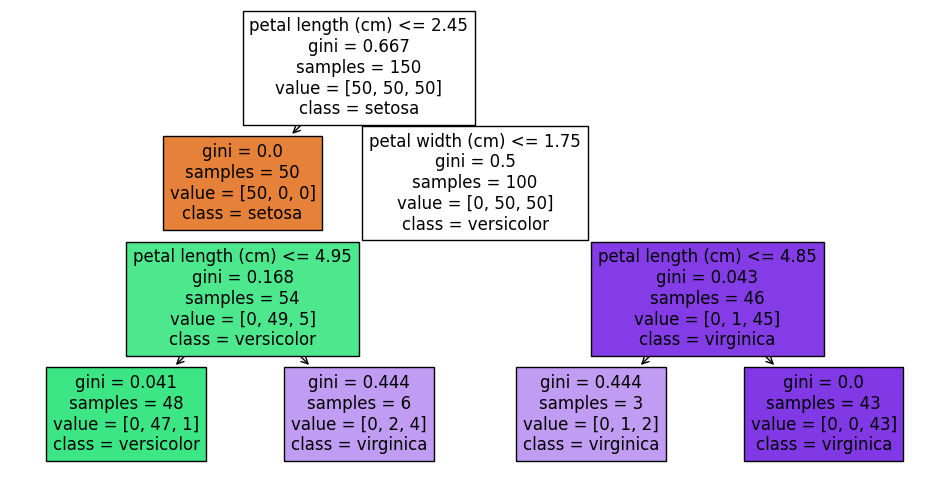

In [4]:
# 可视化
plt.figure(figsize=(12, 6))
plot_tree(clf, filled=True, feature_names=load_iris().feature_names, class_names=load_iris().target_names)
plt.show()

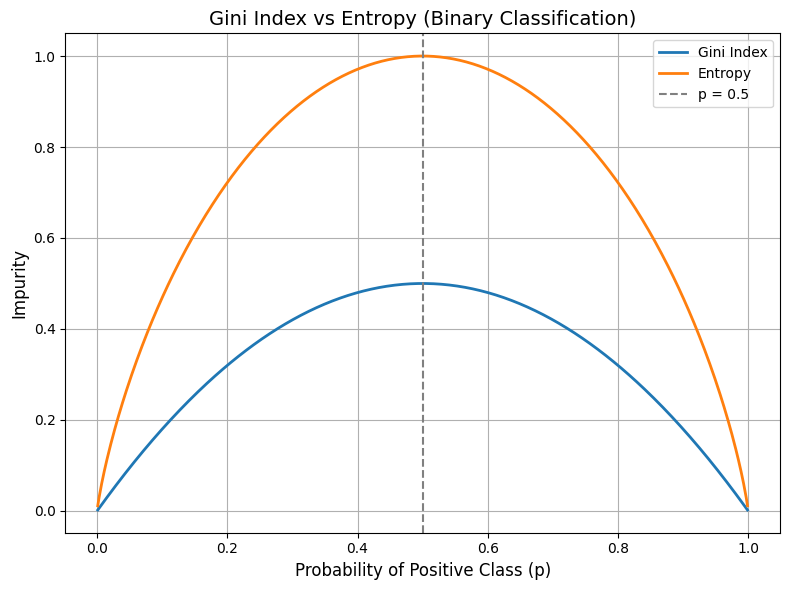

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 概率范围
p = np.linspace(0.001, 0.999, 500)

# Gini 系数和熵的计算
gini = 2 * p * (1 - p)
entropy = -p * np.log2(p) - (1 - p) * np.log2(1 - p)

# 绘图
plt.figure(figsize=(8, 6))
plt.plot(p, gini, label='Gini Index', linewidth=2)
plt.plot(p, entropy, label='Entropy', linewidth=2)
plt.axvline(x=0.5, color='gray', linestyle='--', label='p = 0.5')
plt.title('Gini Index vs Entropy (Binary Classification)', fontsize=14)
plt.xlabel('Probability of Positive Class (p)', fontsize=12)
plt.ylabel('Impurity', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


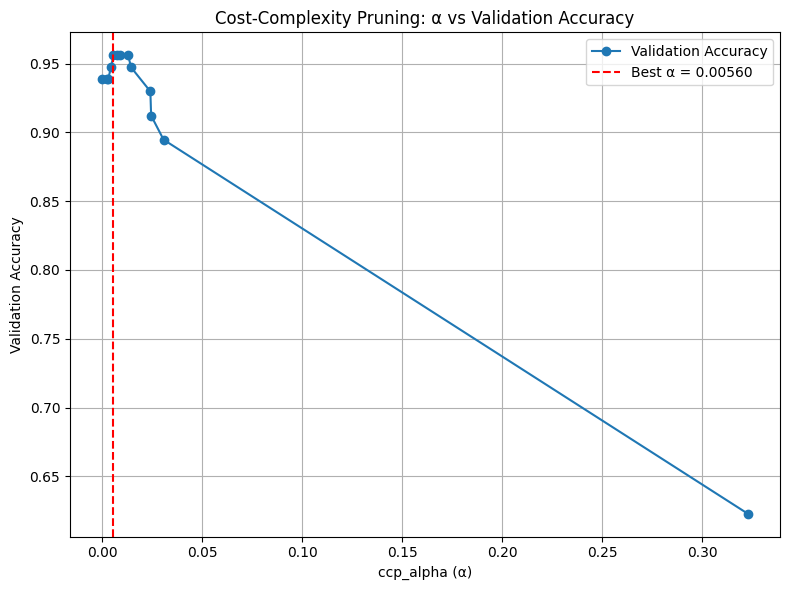

(np.float64(0.005595128280123898), 0.956140350877193)

In [6]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 加载数据
X, y = load_breast_cancer(return_X_y=True)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练完整树，计算剪枝路径
clf_full = DecisionTreeClassifier(random_state=0)
path = clf_full.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# 用每个 alpha 训练一棵树
clfs = []
for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# 计算验证集上的准确率
val_scores = [accuracy_score(y_val, clf.predict(X_val)) for clf in clfs]

# 找到验证集上准确率最高的模型
best_index = val_scores.index(max(val_scores))
best_alpha = ccp_alphas[best_index]
best_score = val_scores[best_index]

# 画图：alpha vs 验证集准确率
plt.figure(figsize=(8, 6))
plt.plot(ccp_alphas, val_scores, marker='o', label='Validation Accuracy')
plt.axvline(x=best_alpha, color='red', linestyle='--', label=f'Best α = {best_alpha:.5f}')
plt.title("Cost-Complexity Pruning: α vs Validation Accuracy")
plt.xlabel("ccp_alpha (α)")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 输出最优结果
best_alpha, best_score


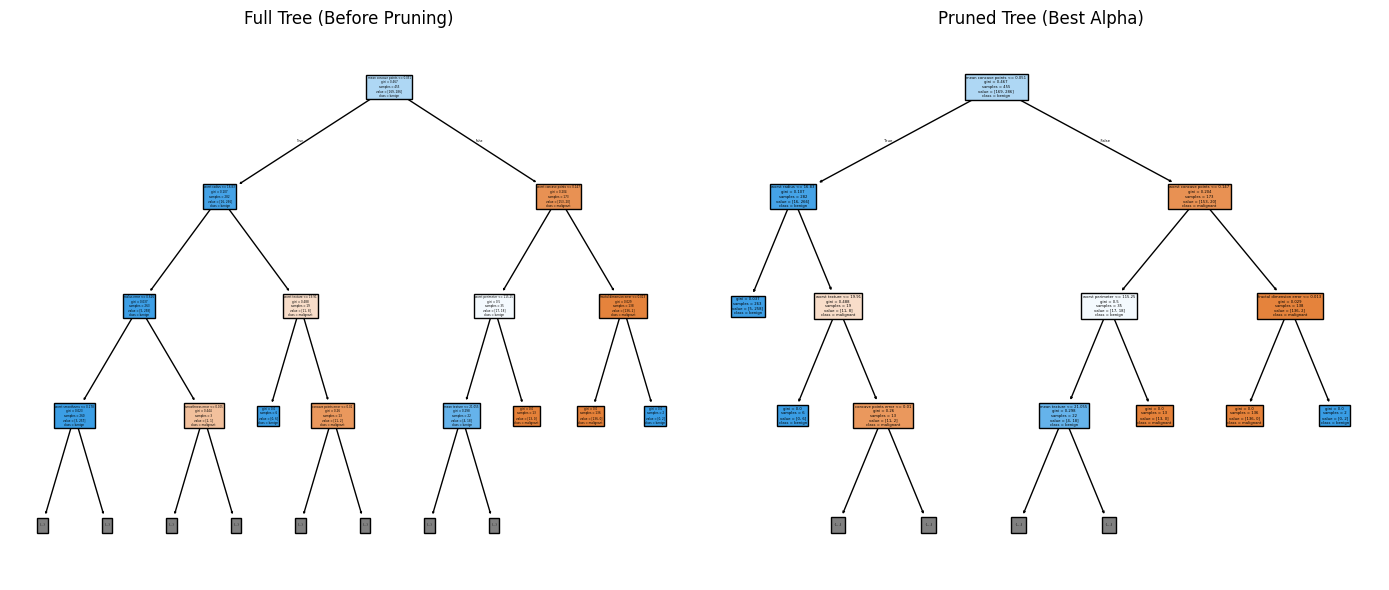

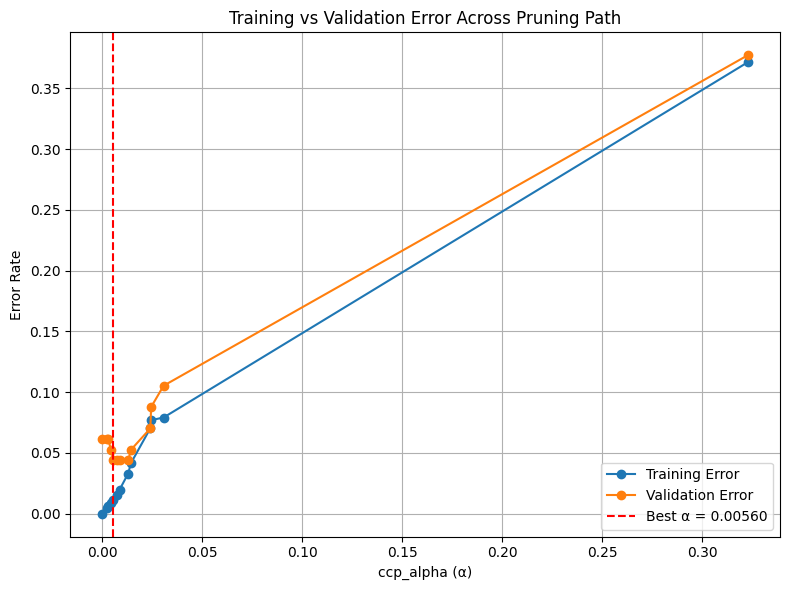

In [7]:
from sklearn.tree import plot_tree
import numpy as np

# 获取未剪枝的完整树（alpha=0）和最优剪枝树（best_alpha）
clf_full = clfs[0]  # 最完整树，对应 alpha=0
clf_best = clfs[best_index]  # 最优子树，对应验证集最优的 alpha

# 可视化剪枝前后的树结构（最多显示层级限制）
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plot_tree(clf_full, max_depth=3, filled=True, feature_names=load_breast_cancer().feature_names, class_names=load_breast_cancer().target_names)
plt.title("Full Tree (Before Pruning)")

plt.subplot(1, 2, 2)
plot_tree(clf_best, max_depth=3, filled=True, feature_names=load_breast_cancer().feature_names, class_names=load_breast_cancer().target_names)
plt.title("Pruned Tree (Best Alpha)")
plt.tight_layout()
plt.show()

# 训练集和验证集误差对比图
train_scores = [1 - accuracy_score(y_train, clf.predict(X_train)) for clf in clfs]
val_errors = [1 - score for score in val_scores]

plt.figure(figsize=(8, 6))
plt.plot(ccp_alphas, train_scores, label='Training Error', marker='o')
plt.plot(ccp_alphas, val_errors, label='Validation Error', marker='o')
plt.axvline(x=best_alpha, color='red', linestyle='--', label=f'Best α = {best_alpha:.5f}')
plt.title("Training vs Validation Error Across Pruning Path")
plt.xlabel("ccp_alpha (α)")
plt.ylabel("Error Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
